# ML Project 1 - Loan Qualification

***Objective:*** 
Build a model to predict whether or not a customer gets a loan

Note: 

Data has been cleaned - checking for biasness etc. are not required

#### Application of decision tree, random forest and gradiant boost model to determine the most appropriate model to use for this business case

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("trainf.csv")

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Capacity%
0,LP001002,1,0,0,0,0,8.674026,146.412162,360,1.0,2,1,8.674026,2.503200
1,LP001003,1,1,1,0,0,8.430109,128.000000,360,1.0,0,0,8.714568,2.101461
2,LP001005,1,1,0,0,1,8.006368,66.000000,360,1.0,2,1,8.006368,2.200000
3,LP001006,1,1,0,1,0,7.856707,120.000000,360,1.0,2,1,8.505323,2.428658
4,LP001008,1,0,0,0,0,8.699515,141.000000,360,1.0,2,1,8.699515,2.350000


In [42]:
df.shape

(614, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            614 non-null    object 
 2   Married           614 non-null    object 
 3   Dependents        614 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     614 non-null    object 
 6   ApplicantIncome   614 non-null    float64
 7   LoanAmount        614 non-null    float64
 8   Loan_Amount_Term  614 non-null    int64  
 9   Credit_History    614 non-null    float64
 10  Property_Area     614 non-null    object 
 11  Loan_Status       614 non-null    object 
 12  Total_Income      614 non-null    float64
 13  Capacity%         614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [36]:
#check missing values in train data
print("Number of missing values in each column of train data \n", df.isnull().sum())

Number of missing values in each column of train data 
 Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
Capacity%           0
dtype: int64


### Data Processing - Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i])

df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Capacity%
0,LP001002,1,0,0,0,0,8.674026,146.412162,360,1.0,2,1,8.674026,2.503200
1,LP001003,1,1,1,0,0,8.430109,128.000000,360,1.0,0,0,8.714568,2.101461
2,LP001005,1,1,0,0,1,8.006368,66.000000,360,1.0,2,1,8.006368,2.200000
3,LP001006,1,1,0,1,0,7.856707,120.000000,360,1.0,2,1,8.505323,2.428658
4,LP001008,1,0,0,0,0,8.699515,141.000000,360,1.0,2,1,8.699515,2.350000


In [45]:
x=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Decision Tree 

max_depth :  how many level will the tree grow

min_samples_leaf : how many min data points should be in the node so that the node doesn't grow anymore and becomes the
leaf node

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth = 10, min_samples_leaf=5)

In [48]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

In [49]:
y_pred_dtree=dtree.predict(x_test)

### Decision Tree Feature Importance

<AxesSubplot:xlabel='importance', ylabel='Features'>

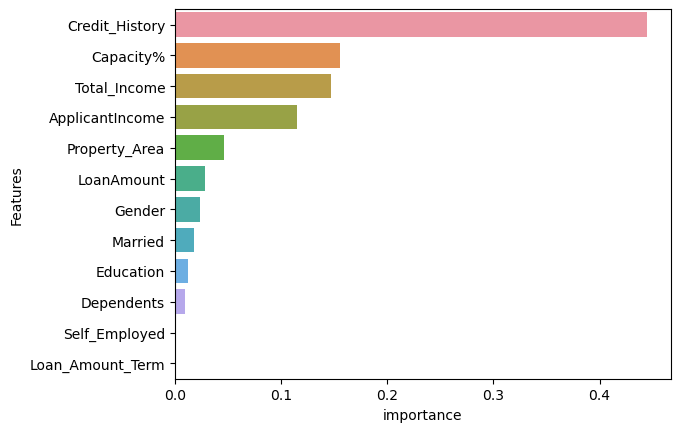

In [50]:
feat_imp={'Columns':x_train.columns.values,'Coefficients':dtree.feature_importances_}
feat_imp=pd.DataFrame()
feat_imp['Features']=x_train.columns.values
feat_imp['importance']=dtree.feature_importances_
feat_imp=feat_imp.sort_values(by='importance', ascending=False)
sns.barplot(y="Features", x="importance", data=feat_imp)

In [51]:
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import accuracy_score
print("accuracy score",round(accuracy_score(y_test, y_pred_dtree),2))
print(classification_report(y_test, y_pred_dtree))

accuracy score 0.72
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        72
           1       0.75      0.84      0.79       131

    accuracy                           0.72       203
   macro avg       0.69      0.67      0.68       203
weighted avg       0.71      0.72      0.71       203



Accuracy score - model is predicting results with 72% accuracy

### ROC Curve

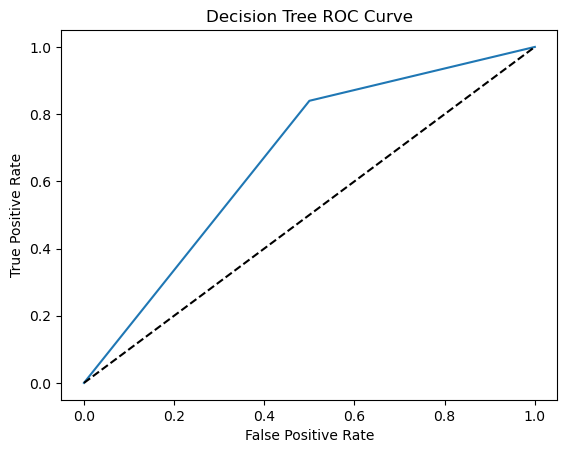

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_dtree)
auc = roc_auc_score(y_test, y_pred_dtree)

plt.plot(fpr,tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

### Hyper Parameter Optimisation

Hyper Parameter Tuning - Test different types of combination of parameters of the max depth and min leaf samples, criteria etc. to come up with the best decision tree

Note: 
GridSearchCV runs through the different parameters and comes up with the best one

In [65]:
clf = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4], #specifying we want max depth to be limited to these
              'max_features': ['sqrt', 'log2', None], #sqrt is square rooting number of features, e.g. sqrt 100 = 10
              'criterion': ['gini', 'entropy']}   #this is where we are specifying the diff combos to be run


cv_clf =GridSearchCV(clf, cv = 10, #gridsearchcv auto runs the loop behind the scenes
                     param_grid=param_dist,
                     n_jobs = 3,scoring='accuracy') #n jobs is the processing power/compute needed to run. use 3 core cpu to run this
                                    #scoring criteria here we used accuracy to base our optimal results on , but we can use precision, f1-score


cv_clf.fit(x_train,y_train)

print('Best Parameters using grid search: \n',
     cv_clf.best_params_) #.best_params_ gives the best params/best combi to give you highest accuracy
end = time.time() #time taken to run this
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt'}
Time taken in grid search:  0.17


### Re run the tree again using these derived parameters

In [66]:
# Set best parameters given by grid search
clf.set_params(criterion = 'gini',max_features = 'sqrt',max_depth = 2)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=42)

In [67]:
clf.fit(x_train,y_train)
y_pred_cv=clf.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score
print("accuracy score",round(accuracy_score(y_test, y_pred_cv),2))

accuracy score 0.81


Accuracy score is more optimal now.

### Tree Visualisation 

First tree before optimising (dtree)

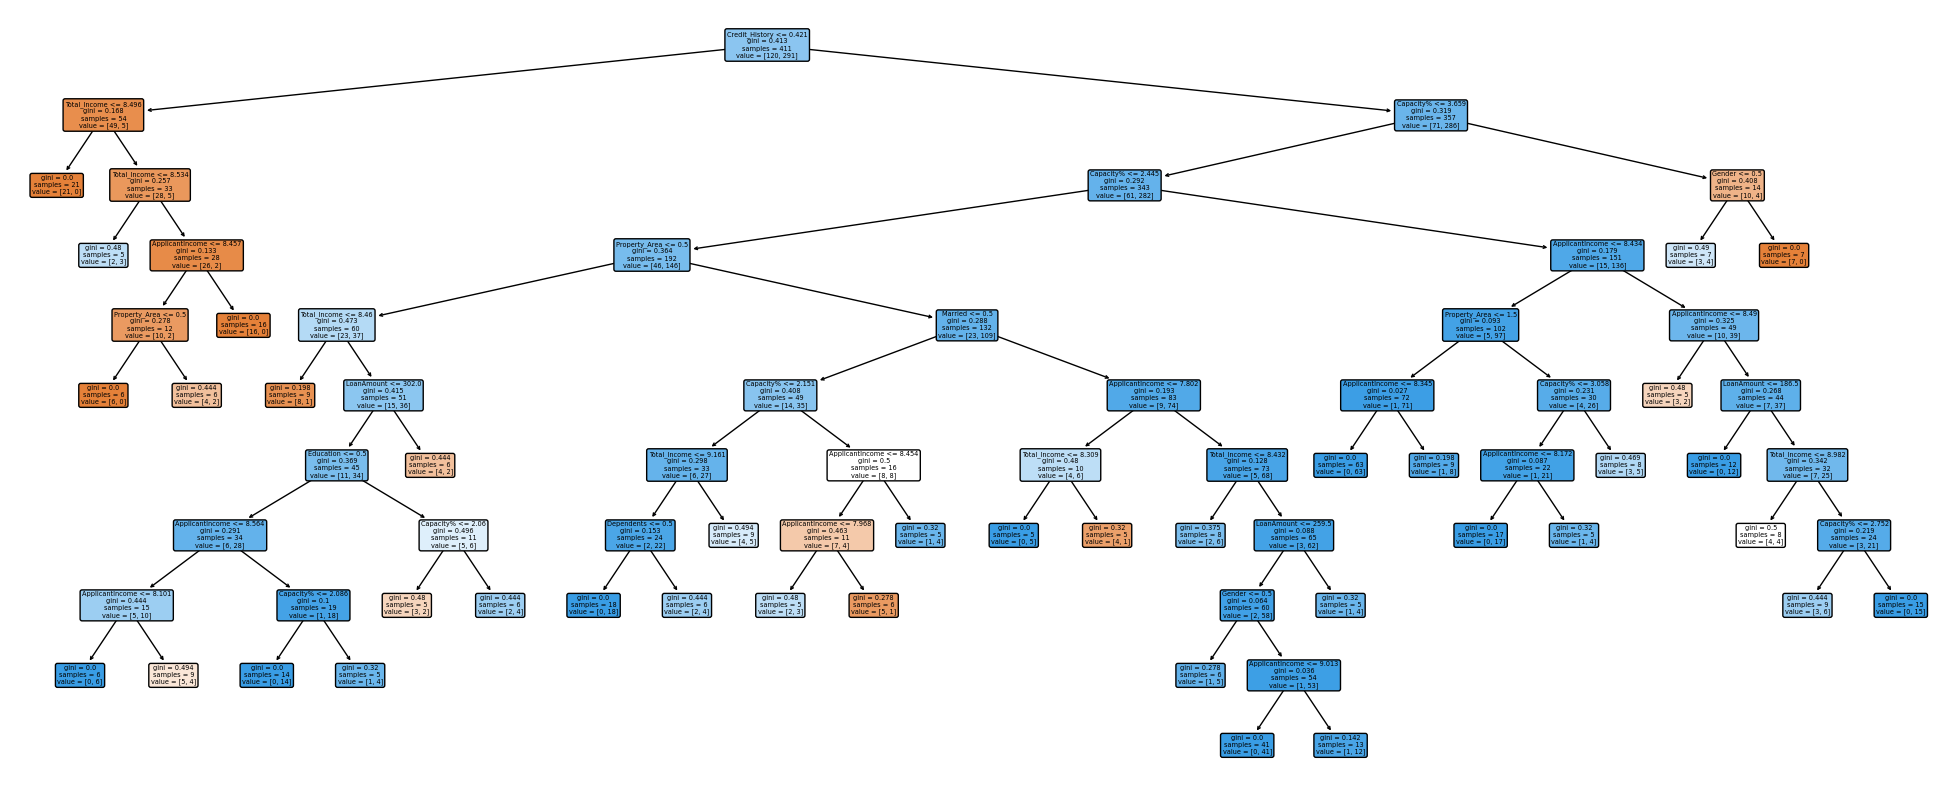

In [69]:
# Visualize the tree

 
from sklearn import tree

plt.figure(figsize = (25,10))
tree.plot_tree(dtree, #using the first tree
                feature_names=x_train.columns,
                filled=True, rounded=True
                )

plt.show()

Credit history is on the top, most important criteria

### Advantages and Disadvantanges of decision Tree

- easy to implement
- but because it is easy it might not be very complex, and might result in overfitting and less accuracy. There are chances it will not perform well in test data

### Random Forest / Bagging 
- random forest is a variation of the bagging technique 
- bootstrap application

In bagging technique, the training data is split to e.g. 80/20 and will take 80% random variables and run a certain amount of decision trees to produce x number of decision tree. Each decision tree will have yes/no and if e.g. out of 3 decision trees, 2 decision trees are 'yes', then the final decision is a yes

- In conclusion it helps to increase the accuracy of the model by increasing the complexity and this helps reduce chances of overfitting
- But disadvantage is that if you use it with a regression model, it's not so accurate

In [72]:
from sklearn.ensemble import RandomForestClassifier #part of the ensaemble class
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [73]:
y_pred_rf=rf.predict(x_test)

### Random Forest Feature Importance

<AxesSubplot:xlabel='importance', ylabel='Features'>

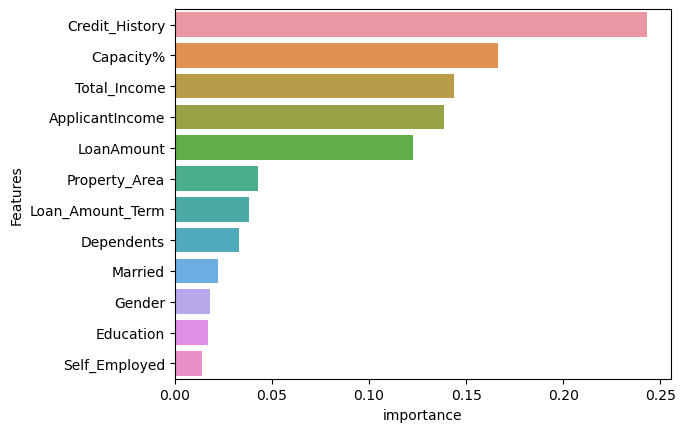

In [74]:
#feature Importance
feat_imp={'Columns':x_train.columns.values,'Coefficients':rf.feature_importances_}
feat_imp=pd.DataFrame()
feat_imp['Features']=x_train.columns.values
feat_imp['importance']=rf.feature_importances_
feat_imp=feat_imp.sort_values(by='importance', ascending=False)
sns.barplot(y="Features", x="importance", data=feat_imp)

No difference compared to decision tree feature importance

### Random Forest Classification Report

In [76]:
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import accuracy_score
print("accuracy score",round(accuracy_score(y_test, y_pred_rf),2))
print(classification_report(y_test, y_pred_rf))

accuracy score 0.82
              precision    recall  f1-score   support

           0       0.89      0.56      0.68        72
           1       0.80      0.96      0.87       131

    accuracy                           0.82       203
   macro avg       0.84      0.76      0.78       203
weighted avg       0.83      0.82      0.81       203



Without having to do hyperparameter tuning, accuracy score is higher

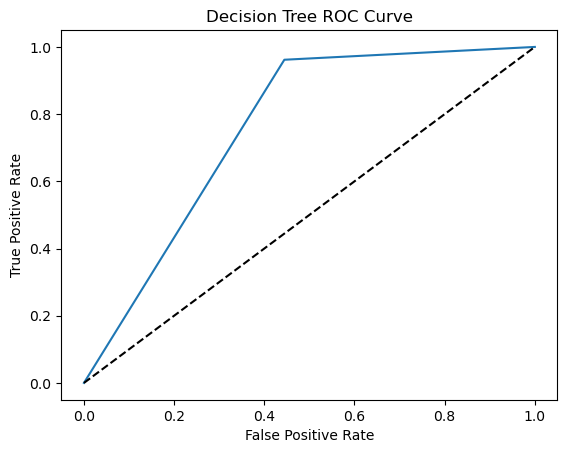

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_pred_rf)

plt.plot(fpr,tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

### Grid search for random forest

In [78]:
rf_tree_cv = RandomForestClassifier(random_state=42)

from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf_tree =GridSearchCV(rf_tree_cv, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3,scoring='accuracy')

cv_rf_tree.fit(x_train,y_train)
print('Best Parameters using grid search: \n',
     cv_rf_tree.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  6.33


In [79]:
# Set best parameters given by grid search
rf_tree_cv.set_params(criterion = 'gini',max_features = None,max_depth = 4)

rf_tree_cv.fit(x_train,y_train)
y_pred_rf_cv=rf_tree_cv.predict(x_test)

from sklearn.metrics import accuracy_score
print("accuracy score",round(accuracy_score(y_test, y_pred_rf_cv),2))

accuracy score 0.81


#### Accuracy has not improved, can try out other combis too

In [80]:
rf_tree_cv = RandomForestClassifier(random_state=42)

from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf_tree =GridSearchCV(rf_tree_cv, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3,scoring='accuracy')

cv_rf_tree.fit(x_train,y_train)
print('Best Parameters using grid search: \n',
     cv_rf_tree.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}
Time taken in grid search:  15.81


In [82]:
# Set best parameters given by grid search
rf_tree_cv.set_params(criterion = 'entropy',max_features = 'sqrt' ,max_depth = 8)

rf_tree_cv.fit(x_train,y_train)
y_pred_rf_cv=rf_tree_cv.predict(x_test)

from sklearn.metrics import accuracy_score
print("accuracy score",round(accuracy_score(y_test, y_pred_rf_cv),2))

accuracy score 0.81


#### No further improvements as well

### Boosting

Gradient boosting
- time consuming and coputationally expensive 
- reduces error to 0

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
start= time.time()
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(x_train,y_train)
y_pred_gbm=gbm0.predict(x_test)
end = time.time()
print('Time taken in algo run: {0: .2f}'.format(end - start))

Time taken in algo run:  0.10


### Hyper parameter tuning for gradient boosting

In gradient boosting model there are 2 types of hyperparameter tuning 
- tree based hyperparameter optimization: see above (how many depths etc. etc.)
- boosting parameter: subsample and learning_rate (the lower will be very accurate but takes long time, too high it learns too fast and might not result in good testing data, need to find sweet spot by experimenting, 

subsample is how many data points go into the trees, same as above but its called subsample here

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV
gbm_cv = GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt', subsample=0.8, random_state=10)
np.random.seed(42)
start = time.time()
param_test1 = {'max_depth':range(1,20,2), 'min_samples_split':range(2,20,3),'min_samples_leaf':range(1,12,2),'n_estimators':range(20,81,10)}
cv_gb_tree1 =GridSearchCV(gbm_cv, cv = 5,
                     param_grid = param_test1, scoring='accuracy',n_jobs=4)

cv_gb_tree1.fit(x_train,y_train)
y_pred_gbm_cv1=cv_gb_tree1.predict(x_test)
print('Best Parameters using grid search: \n',
    cv_gb_tree1.best_params_)  
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 17, 'n_estimators': 40}
Time taken in grid search:  102.88


In [86]:
#trying it by varying the subsample this time
gbm_cv = GradientBoostingClassifier(learning_rate=0.1,max_depth=11,min_samples_leaf=7,min_samples_split=17,max_features='sqrt', random_state=10,n_estimators=40)
np.random.seed(42)
start = time.time()
param_test2 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
cv_gb_tree2 =GridSearchCV(gbm_cv, cv = 5,
                     param_grid= param_test2, scoring='accuracy',n_jobs=4)

cv_gb_tree2.fit(x_train,y_train)
y_pred_gbm_cv2=cv_gb_tree2.predict(x_test)
print('Best Parameters using grid search: \n',
    cv_gb_tree2.best_params_)  
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'subsample': 0.8}
Time taken in grid search:  0.26


In [88]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1,max_depth=11,min_samples_leaf=7,min_samples_split=17,
                                  max_features='sqrt', random_state=10,n_estimators=40, subsample=0.8)
gbm1.fit(x_train,y_train)
y_pred_gbm1=gbm1.predict(x_test)
print("accuracy score",round(accuracy_score(y_test, y_pred_gbm1),2))
print(classification_report(y_test, y_pred_gbm1))

accuracy score 0.78
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        72
           1       0.79      0.91      0.84       131

    accuracy                           0.78       203
   macro avg       0.78      0.73      0.74       203
weighted avg       0.78      0.78      0.77       203



gradient boosting model doesn't perform as well

### In conclusion

- If going for accuracy: use random forest or gradient booster
- If going for speed: use decision tree or logistic regression